# Extra cases

The most simple and common application of a chi-squared test is that to study the correlation between two categorical variables with just two levels. The test is then carried out on a 2x2 table of counts (with *df*=1). In this notebook, we will see that the chi-squared test has a wider applicability, however. We'll cover two more examples from the Spanish novels dataset, which contains metadata on the protagonist in each of the books:

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy as sp
from statsmodels.graphics.mosaicplot import mosaic

In [2]:
novels = pd.read_csv("../../datasets/correlaciones/spanish-novels.tsv", sep="\t")[
    ["protagonist-gender", "protagonist-social-level"]
]
novels.columns = novels.columns.str.replace("-", "_")
novels

,protagonist_gender,protagonist_social_level
0,male,high
1,female,low
2,male,low
3,mixed,high
4,female,low
...,...,...
155,female,medium
156,male,low
157,male,medium
158,male,medium


## Male vs female

Since there are so few protagonists (3) not assigned to binary gender, we will have to drop them to make the analysis easier

In [3]:
novels = novels[novels.protagonist_gender.isin(["male", "female"])]

How frequent are male and female protagonists?

In [4]:
novels.protagonist_gender.value_counts()

protagonist_gender
male      120
female     37
Name: count, dtype: int64

If we assume that the number of women and men are [roughly the same](https://en.wikipedia.org/wiki/Human_sex_ratio) in human societies, it would seem that women are underrepresented as protagonists in this dataset. Can we quantify our surprise at this distribution in more exact terms? How likely would it be that this distribution arose from pure chance (as opposed to an obvious underrepresentation)? The chi-squared test can be used for this purpose too.

Here we will use the 'vanilla' test for goodness of fit. We provide a one-dimensional frequency histogram, with a matching histogram of expected values.

In [5]:
# half the number of rows (subjects) are expected to be female
exp = novels.protagonist_gender.shape[0] * 0.5
sp.stats.chisquare(novels.protagonist_gender.value_counts(), [exp, exp])

Power_divergenceResult(statistic=43.87898089171974, pvalue=3.4932020882557135e-11)

The low p-value indicates that there's almost no support for the null hypothesis that this distribution would have arisen from pure chance.

Note that here:
- We are only dealing with a *single* categorical variable
- We can provide the expected frequencies ourselves

## Gender vs social class

Let's ask an actual literary question! The table also includes data on the social class of protagonists:

In [6]:
novels.protagonist_social_level.value_counts()

protagonist_social_level
medium    91
high      39
low       27
Name: count, dtype: int64

Most of the protagonists belong to the middle class. Might there be a relationship with gender?

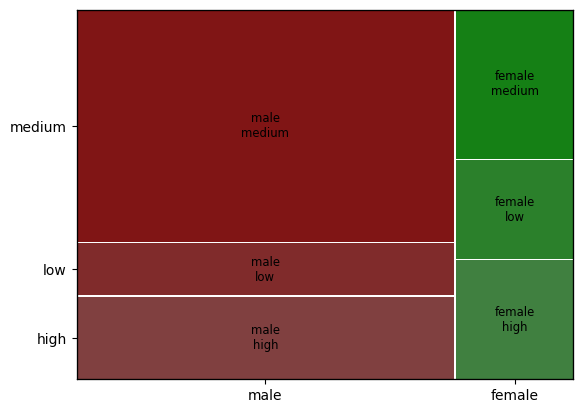

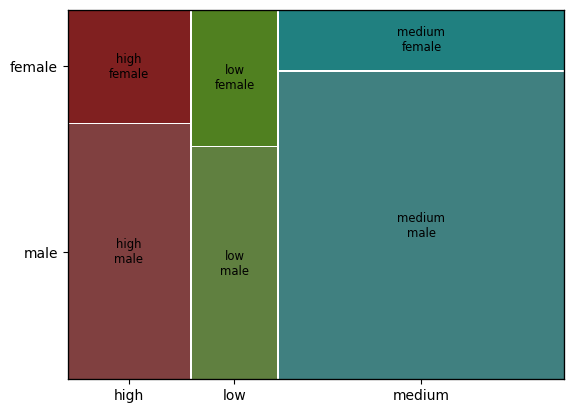

In [7]:
mosaic(novels, ["protagonist_gender", "protagonist_social_level"])
plt.show()
mosaic(novels, ["protagonist_social_level", "protagonist_gender"])
plt.show()

These plots show that women are under-represented in the middle class: female protagonists are apparently pushed to the richer and poorer extremes. The opposite is true for male protagonists, who are overrepresented in the middle class, and underrepresented in the high and low class.

We can use the chi-square test to test whether the relationship between these two variables is significant *as a whole*. Note that here, we will effortlessly apply the test to a *2x3 counts* table. Apart from the degrees of freedom (*df* = 2), nothing much changes in the way the test statistic is calculated. The test can be applied to counts tables of **arbitrary dimensions**.

In [8]:
obs = pd.crosstab(novels.protagonist_gender, novels.protagonist_social_level)
obs

protagonist_social_level,high,low,medium
protagonist_gender,,,
female,12,10,15
male,27,17,76


In [9]:
res = sp.stats.chi2_contingency(obs)

We can also numerically compare the observed vs expected frequencies. `DataFrame` objects can be subtracted if they are the same shape! This is a little basic (R has a better kind of plot for this), but it does the job of showing whether each category is over or under its expected value.

In [10]:
obs - res.expected_freq

protagonist_social_level,high,low,medium
protagonist_gender,,,
female,2.808917,3.636943,-6.44586
male,-2.808917,-3.636943,6.44586


In [11]:
# are all() expected_freq entries > 5?
# decompose this cell if you don't know how it works...

(res.expected_freq > 5).all()

True

Finally, we can check the results of the test. First of all, we check the assumptions.
- More than 60 data points
- Expected frequency counts all above 5 (barely)
- No repeated measurements? (you didn't check, but we did)

In [12]:
res

Chi2ContingencyResult(statistic=6.3776158942825605, pvalue=0.04122097924955523, dof=2, expected_freq=array([[ 9.1910828 ,  6.36305732, 21.44585987],
       [29.8089172 , 20.63694268, 69.55414013]]))

The resulting $p$-value points towards (borderline) significance. (Probably there are too few women in the dataset to make very strong claims.) Our total number of degrees of freedom increased, here, which also makes it harder to see a significant result, particularly with a small number of samples (and quite an unbalanced set of datapoints, given the few female protagonists overall).

```
Version History

Current: v1.0.1

2/10/24: 1.0.0: first draft, BN
08/10/24: 1.0.1: proofread, MK
```